In [36]:
import pandas as pd
import pathlib
import numpy as np
import re


DATA_FOLDER = pathlib.Path("./test1")
PATH_TRAJECTORY_DATA = DATA_FOLDER / "fast_lio_path.csv"
TIMESTAMP_DATA = DATA_FOLDER / "imu_data_3.txt"

In [28]:
class TrajectoryPoints:

    keys = ["x","y","z","timestamp"]

    def __init__(self,PATH_TRAJECTORY_DATA):
        self.PATH_TRAJECTORY_DATA = PATH_TRAJECTORY_DATA
        self.raw_data = np.array(pd.read_csv(self.PATH_TRAJECTORY_DATA))
        self.processed_data = [{k:v for (k,v) in zip(self.keys,list(point))} for point in self.raw_data]



In [39]:
class TrajectoryTimestamps:
    """
    This class establishes a structured framework to extract timestamps associated with specific line segments, requiring only the data location link as an input.
    """

    def __init__(self, TIMESTAMP_DATA):
        self.TIMESTAMP_DATA = TIMESTAMP_DATA
        self.raw_data = open(self.TIMESTAMP_DATA,"r")
        self.raw_lines = [line for line in self.raw_data if line != "\n"]
        self.processed_timestamps = [''.join(re.findall("[0-9]+", raw_line)) for raw_line in self.raw_lines]
        


In [42]:
trajectory_timestamps = TrajectoryTimestamps(TIMESTAMP_DATA)
print(trajectory_timestamps.raw_lines[0])
print(trajectory_timestamps.timestamps[0])


Timestamp: builtin_interfaces.msg.Time(sec=1692308993, nanosec=668548939)

1692308993668548939


In [43]:
["a","b","c"]+["d"]

['a', 'b', 'c', 'd']

In [56]:
num = ["A","","","","","B"]



num[0:0]

[]

In [46]:
import pathlib
import numpy as np

PROJECTS_DIRECTORY = pathlib.Path("./../projects")
PROJECT = PROJECTS_DIRECTORY / "dibner_18_08_2023_test1"

class GPRScans:
    """
    Class to manage GPR scan data processing and organization.
    """

    keys = ["scan_number", "scan"]  # List of keys for the scan data dictionary.

    def get_raw_scan(self):
        """
        Retrieve a list of raw scan file paths from the project directory.

        Returns:
            list: List of raw scan file paths.
        """
        # Generate a list of all files within the project directory and its subdirectories.
        p = self.project_path.glob('**/*')
        files = [x for x in p if x.is_file()]
        return files

    def sort_raw_scans(self):
        """
        Sort the list of raw scan file paths in ascending order.

        Returns:
            list: List of sorted raw scan file paths.
        """
        scan_paths = self.get_raw_scan()
        scan_paths.sort()  # Sort the scan file paths.
        return scan_paths

    def load_raw_scans(self):
        """
        Load raw scan data from files and organize it along with scan numbers.

        Returns:
            list: List of dictionaries, each containing raw scan data and its scan number.
        """
        raw_scans = []
        for scan_num, scan_path in enumerate(self.saved_scans):
            # Load raw scan data from a file and store it in a dictionary along with its scan number.
            raw_scan_data = np.array(np.load(scan_path)).astype(int)
            raw_scans.append({"line_scan_data": raw_scan_data, "line_scan_num": scan_num})
        return raw_scans

    def process_raw_scans(self):
        """
        Process the raw scan data by flipping alternate scans and organizing them.

        Returns:
            list: List of dictionaries, each containing processed scan data and its scan number.
        """
        processed_scan_data = []
        for scan in self.raw_scans:
            if scan["line_scan_num"] % 2 != 0:
                # Flip the data if the scan number is odd, keeping even scans as-is.
                processed_scan_data.append({"line_scan_data": np.flip(scan["line_scan_data"]),
                                            "line_scan_num": scan["line_scan_num"]})
            else:
                processed_scan_data.append({"line_scan_data": scan["line_scan_data"],
                                            "line_scan_num": scan["line_scan_num"]})
        return processed_scan_data

    def __init__(self, PROJECT):
        """
        Initialize the GPRScans object with project-specific data and processing steps.

        Args:
            PROJECT (pathlib.Path): The project directory path.
        """
        self.project_path = PROJECT / "predictions/autoencoder/loss"
        self.saved_scans = self.sort_raw_scans()  # Get and sort raw scan file paths.
        self.raw_scans = self.load_raw_scans()    # Load raw scan data from files.
        self.processed_scans = self.process_raw_scans()  # Process the raw scan data.

    
gprScan = GPRScans(PROJECT)
gprScan.raw_scans[1]['line_scan_data'] - gprScan.processed_scans[1]['line_scan_data']
# for scan_num, scan_path in enumerate(gprScan.saved_scans):
#     x = np.array(np.load(scan_path)).astype(int)
#     print(scan_path)
#     print(len(x))
    

array([ 0,  0,  1,  0, -1, -1,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  1,  1,  1,  1,  1,  0,  0,  0,  0,  0,  0, -1,  0,
       -1,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0, -1,  1,  1,  1,
        1,  0,  1,  1,  1,  1,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  0,  0,
        1,  1,  0,  0,  1,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,
        0,  0,  0, -1, -1, -1,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
        0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,
        0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  0,  0,
        0,  0,  0,  0,  0

In [85]:
import numpy as np
import matplotlib.pyplot as plt

scan = np.array([1,1,1,0,0,0,0,1,1,0])

start_x = 0
start_y = 1
end_x = 2
end_y = -1
line_num = 1
rise = end_y - start_y
run = end_x - start_x
slope_x = rise/run
intercept_x = 1

line_equation = {
    'slope_x': slope_x,
    'intercept_x': intercept_x,
    'start_x': start_x,
    'start_y': start_y,
    'end_x': end_x,
    'end_y': end_y,
    'num':line_num
}


def encode_line_scan_data(scan):
    if scan[0] == 1:
        count = 0
        position = 0
        line_scan_state = []
        scan_state = 1
        for i in scan:
            if i == scan_state:
                count += 1
            else:
                line_scan_state.append({'scan_state':scan_state, 'percentage':count/len(scan), 'position':position})
                if scan_state == 1:
                    scan_state = 0
                else:
                    scan_state = 1
                count = 1
                position += 1
        line_scan_state.append({'scan_state':scan_state, 'percentage':count/len(scan), 'position':position})
    return line_scan_state

encoded_line_scan = encode_line_scan_data(scan)

def plot_lines_with_colors(line_equation):
    start_x_ = line_equation['start_x']
    dist_x = line_equation['start_x'] - line_equation['end_x']
    start_y_ = line_equation['start_y']
    dist_y = line_equation['start_y'] - line_equation['end_y']
    percentage = 0
    for line in encoded_line_scan:
        percentage += line['percentage']
        end_x_ = start_x + dist_x*percentage
        end_y_ = start_y + dist_y*percentage
        if line['scan_state'] == 1:
            
            color = 'blue'
        else:
            color = 'gray'
        plt.plot([start_x_, end_x_], [start_y_, end_y_], color)
        start_x_ = end_x_
        start_y_ = end_y_

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Lines with Limited Lengths')
    plt.grid(True)
    plt.show()
        



In [89]:
import pandas as pd
import pathlib
import numpy as np
import re
from sklearn.linear_model import RANSACRegressor
import matplotlib.pyplot as plt
import scipy

DATA_FOLDER = pathlib.Path("./test1")
PATH_TRAJECTORY_DATA = DATA_FOLDER / "fast_lio_path.csv"
TIMESTAMP_DATA = DATA_FOLDER / "imu_data_3.txt"
PROJECTS_DIRECTORY = pathlib.Path("./../projects")
PROJECT = PROJECTS_DIRECTORY / "dibner_18_08_2023_test1"

class TrajectoryPoints:
    """
    This class establishes a structured framework to encapsulate LiDAR captured trajectory points, requiring only the data location link as an input.
    """

    keys = ["x","y","z","timestamp",'position']

    def __init__(self,PATH_TRAJECTORY_DATA):
        """
        Initialize the TrajectoryPoints object by reading and processing data from a CSV file.
        
        Args:
            PATH_TRAJECTORY_DATA (str): The path to the CSV file containing trajectory data.
        """
        self.PATH_TRAJECTORY_DATA = PATH_TRAJECTORY_DATA
        self.raw_data = np.array(pd.read_csv(self.PATH_TRAJECTORY_DATA))
        self.processed_data = [{k:v for (k,v) in zip(self.keys,[point[0],point[1],point[2],point[3],position])} for position, point in enumerate(self.raw_data)]

class TrajectoryTimestamps:
    """
    This class establishes a structured framework to extract timestamps associated with specific line segments,
    requiring only the data location link as an input.
    """

    def __init__(self, TIMESTAMP_DATA):
        """
        Initialize the TrajectoryTimestamps object by reading and processing timestamp data from a file.

        Args:
            TIMESTAMP_DATA (str): The path to the file containing timestamp data.
        """
        self.TIMESTAMP_DATA = TIMESTAMP_DATA
        self.raw_data = open(self.TIMESTAMP_DATA, "r")
        self.raw_lines = [line for line in self.raw_data if line != "\n"]
        self.processed_string_timestamps = [''.join(re.findall("[0-9]+", raw_line)) for raw_line in self.raw_lines]
        self.processed_timestamps = [int(timestamp) if len(timestamp)==19 else int(timestamp+"0") for timestamp in self.processed_string_timestamps]

class GPRScans:
    """
    Class to manage GPR scan data processing and organization.
    """

    keys = ["scan_number", "scan"]  # List of keys for the scan data dictionary.

    def get_raw_scan(self):
        """
        Retrieve a list of raw scan file paths from the project directory.

        Returns:
            list: List of raw scan file paths.
        """
        # Generate a list of all files within the project directory and its subdirectories.
        p = self.project_path.glob('**/*')
        files = [x for x in p if x.is_file()]
        return files

    def sort_raw_scans(self):
        """
        Sort the list of raw scan file paths in ascending order.

        Returns:
            list: List of sorted raw scan file paths.
        """
        scan_paths = self.get_raw_scan()
        scan_paths.sort()  # Sort the scan file paths.
        return scan_paths

    def load_raw_scans(self):
        """
        Load raw scan data from files and organize it along with scan numbers.

        Returns:
            list: List of dictionaries, each containing raw scan data and its scan number.
        """
        raw_scans = []
        for scan_num, scan_path in enumerate(self.saved_scans):
            # Load raw scan data from a file and store it in a dictionary along with its scan number.
            raw_scan_data = np.array(np.load(scan_path)).astype(int)
            raw_scans.append({"line_scan_data": raw_scan_data, "line_scan_num": scan_num})
        return raw_scans

    def process_raw_scans(self):
        """
        Process the raw scan data by flipping alternate scans and organizing them.

        Returns:
            list: List of dictionaries, each containing processed scan data and its scan number.
        """
        processed_scan_data = []
        for scan in self.raw_scans:
            if scan["line_scan_num"] % 2 != 0:
                processed_scan_data.append({"line_scan_data": scan["line_scan_data"],
                                            "line_scan_num": scan["line_scan_num"]})
            else:
                processed_scan_data.append({"line_scan_data": scan["line_scan_data"],
                                            "line_scan_num": scan["line_scan_num"]})
        return processed_scan_data
    
    def encode_line_scan_data(self):
        processed_scan_data = []
        for scan in self.raw_scans:
            median_filtered_scan_data = scipy.signal.medfilt(scan['line_scan_data'],kernel_size=self.KERNEL) #kernel_size of 7 chosen arbitrarily, should have some testing to determine the best kernel size
            scan_state = median_filtered_scan_data[0]
            count = 0
            position = 0
            line_scan_state = []
            scan_len = len(median_filtered_scan_data)
            for i in median_filtered_scan_data:
                if i == scan_state:
                    count += 1
                else:
                    line_scan_state.append({'scan_state':scan_state, 'percentage':count/scan_len, 'position':position})
                    count = 1
                    position += 1
                    scan_state = i
            line_scan_state.append({'scan_state':scan_state, 'percentage':count/scan_len, 'position':position})
            processed_scan_data.append(line_scan_state)
        return processed_scan_data
    
    def medfilt_scan(self):
        medfilt_scans = []
        for scan in self.raw_scans:
            median_filtered_scan_data = scipy.signal.medfilt(scan['line_scan_data'],kernel_size=self.KERNEL)
            medfilt_scans.append(median_filtered_scan_data)
        return medfilt_scans
    
    def __init__(self, PROJECT):
        """
        Initialize the GPRScans object with project-specific data and processing steps.

        Args:
            PROJECT (pathlib.Path): The project directory path.
        """
        self.KERNEL = 61
        self.project_path = PROJECT / "predictions/autoencoder/loss"
        self.saved_scans = self.sort_raw_scans()  # Get and sort raw scan file paths.
        self.raw_scans = self.load_raw_scans()    # Load raw scan data from files.
        self.processed_scans = self.encode_line_scan_data()  # Process the raw scan data.
        self.median_filtered_scan = self.medfilt_scan()

def import_lidar_trajectory(PATH_TRAJECTORY_DATA):
    """
    Import and process LiDAR trajectory data from a CSV file.
    
    Args:
        PATH_TRAJECTORY_DATA (str): The path to the CSV file containing trajectory data.
        
    Returns:
        list: Processed LiDAR trajectory data in a list of dictionaries.
    """
    trajectory_points = TrajectoryPoints(PATH_TRAJECTORY_DATA)
    return trajectory_points.processed_data

def import_lidar_timestamps(TIMESTAMP_DATA):
    """
    Import and process LiDAR timestamps from a file.

    Args:
        TIMESTAMP_DATA (str): The path to the file containing timestamp data.

    Returns:
        list: Processed LiDAR timestamps extracted from the file.
    """
    trajectory_timestamps = TrajectoryTimestamps(TIMESTAMP_DATA)
    return trajectory_timestamps.processed_timestamps

def find_nearest_timestamp_positions(lidar_traj, line_timestamps):
    """
    Find the positions of LiDAR trajectory points with the least timestamp difference from the provided line timestamps.

    Args:
        lidar_traj (list): Processed LiDAR trajectory data in a list of dictionaries.
        line_timestamps (list): Processed LiDAR timestamps extracted from a file.

    Returns:
        list: Positions of trajectory points with the least timestamp difference for each line timestamp.
    """
    nearest_positions = []

    for line_timestamp in line_timestamps:
        min_difference = float('inf')
        nearest_position = None

        for point in lidar_traj:
            point_timestamp = point['timestamp']
            timestamp_difference = abs(int(point_timestamp) - int(line_timestamp))
            
            if timestamp_difference < min_difference:
                min_difference = timestamp_difference
                nearest_position = point['position']

        nearest_positions.append(nearest_position)

    return nearest_positions

def load_GPR_scan(PROJECT):
    """
    Load and process GPR scan data using the GPRScans class.

    This function initializes an instance of the GPRScans class with the specified project directory, processes the raw
    scan data, and returns the list of processed scan data.

    Args:
        PROJECT (pathlib.Path): The project directory path.

    Returns:
        list: List of dictionaries, each containing processed scan data and its scan number.
    """
    gprScan = GPRScans(PROJECT)  # Initialize a GPRScans instance for the specified project.
    return gprScan.processed_scans  # Return the processed scan data.

def analyze_GPR_scan():
    pass

def pair_nearest_positions(nearest_positions):
    """
    Pair every 2 entries in the nearest_positions list into tuples and return a list of tuples.

    Args:
        nearest_positions (list): List of positions of trajectory points.

    Returns:
        list: List of tuples, each containing a pair of consecutive positions.
    """
    if len(nearest_positions)%2 == 0:
        paired_positions = [(nearest_positions[i], nearest_positions[i + 1]) for i in range(0, len(nearest_positions) - 1, 2)]
        return paired_positions
    else:
        print("THERE IS AN ERROR IN YOUR TIMESTAMPS")
        return None

def extract_points_between_positions(paired_positions, lidar_traj):
    """
    Extract trajectory points between specified position ranges from the LiDAR trajectory data.

    This function takes a list of position range tuples and the LiDAR trajectory data, and returns a list of
    sublists, each containing trajectory points between the specified position ranges.

    Args:
        paired_positions (list): List of tuples, where each tuple contains a pair of consecutive positions.
        lidar_traj (list): Processed LiDAR trajectory data in a list of dictionaries.

    Returns:
        list: List of sublists, each containing trajectory points between the specified position ranges.
    """
    extracted_lines = []

    # Iterate through each position range tuple
    for start_position, end_position in paired_positions:
        # Extract trajectory points between start and end positions (inclusive)
        points_between_positions = lidar_traj[start_position : end_position + 1]

        # Append the sublist of points to the extracted_lines list
        extracted_lines.append(points_between_positions)

    return extracted_lines

def linear_regression(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)

    numerator = np.sum((x - x_mean) * (y - y_mean))
    denominator = np.sum((x - x_mean) ** 2)

    slope = numerator / denominator
    intercept = y_mean - slope * x_mean

    return slope, intercept

def get_line_equations_from_lines(extracted_lines):
    line_equations = []

    for line_num,line in enumerate(extracted_lines):
        line_data = pd.DataFrame(line)  # Convert the sublist to a DataFrame
        x_values = line_data["x"].values
        y_values = line_data["y"].values

        # Get start and end "x" and "y" points
        start_x, start_y = x_values[0], y_values[0]
        end_x, end_y = x_values[-1], y_values[-1]

        # Fit a linear regression model for "x" and "y" components
        slope_x, intercept_x = linear_regression(x_values, y_values)

        # Store the line equation, start and end points in a dictionary
        line_equation = {
            'slope_x': slope_x,
            'intercept_x': intercept_x,
            'start_x': start_x,
            'start_y': start_y,
            'end_x': end_x,
            'end_y': end_y,
            'num':line_num
        }
        line_equations.append(line_equation)

    return line_equations

def plot_lines_with_colours(line_equations,PROJECT):
    processed_scans = load_GPR_scan(PROJECT)
    for line_equation in line_equations:
        start_x = line_equation['start_x']
        start_y = line_equation['start_y']
        start_x_ = line_equation['start_x']
        dist_x = line_equation['end_x'] - line_equation['start_x']
        start_y_ = line_equation['start_y']
        dist_y = line_equation['end_y'] - line_equation['start_y']
        percentage = 0
        for processed_scan in processed_scans:
            for line in processed_scan:
                percentage += line['percentage']
                end_x_ = start_x_ + dist_x*percentage
                end_y_ = start_y_ + dist_y*percentage
                print(start_x_)
                print(end_x_)
                if line['scan_state'] == 1:
                    
                    color = 'blue'
                else:
                    color = 'gray'
                plt.plot([start_x_, end_x_], [start_y_, end_y_], color)
                start_x_ = end_x_
                start_y_ = end_y_
    plt.grid(True)
    plt.show()

def plot_lines_with_limits(line_equations):
    plt.figure(figsize=(10, 8))

    for line_eq in line_equations:
        slope_x = line_eq['slope_x']
        intercept_x = line_eq['intercept_x']
        start_x = line_eq['start_x']
        end_x = line_eq['end_x']

        # Calculate corresponding start and end y points
        start_y = slope_x * start_x + intercept_x
        end_y = slope_x * end_x + intercept_x

        # Plot the line segment
        plt.plot([start_x, end_x], [start_y, end_y], '-')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Lines with Limited Lengths')
    plt.grid(True)
    plt.show()

def create_line_from_isolated_points():
    pass

def extract_start_point_from_line():
    pass

def extract_end_point_from_line():
    pass

def divide_line_into_GPR_segments():
    pass

def transform_line_into_rectangle():
    pass

def choose_width_of_rectangle():
    pass


0.0415686268285883
-1.0245381060552479
-1.0245381060552479
-2.2185776468851444
-2.2185776468851444
-10.651481903996288
-10.651481903996288
-19.553473123576318
-19.553473123576318
-28.519430747129377
-28.519430747129377
-39.50272883598188
-39.50272883598188
-50.70120990779965
-50.70120990779965
-68.63312515490577
-68.63312515490577
-95.53099802556495
-95.53099802556495
-126.00458018656971
-126.00458018656971
-157.42545846553915
-157.42545846553915
-193.2892889597514
-193.2892889597514
-229.32727834305422
-229.32727834305422
-265.6426318830569
-265.6426318830569
-310.19505584412235
-310.19505584412235
-354.7926321097668
-354.7926321097668
-399.3966587046369
-399.3966587046369
-444.1296918840185
-444.1296918840185
-488.9594800017838
-488.9594800017838
-533.9937440017725
-533.9937440017725
-579.220091406274
-579.220091406274
-633.0158371475924
-633.0158371475924
-693.818761482093
-693.818761482093
-754.9717081862818
-754.9717081862818
-816.6698820432543
-816.6698820432543
-878.489217489734

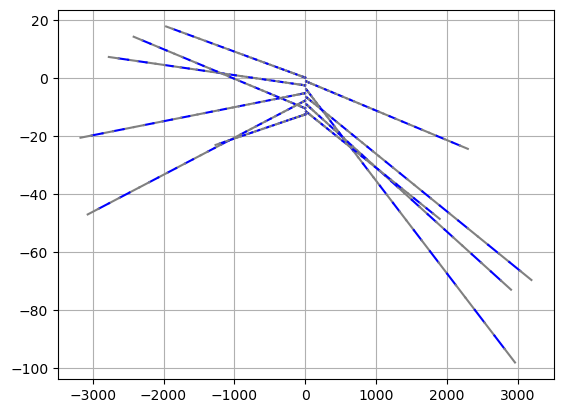

In [90]:
lidar_traj = import_lidar_trajectory(PATH_TRAJECTORY_DATA)
line_timestamps = import_lidar_timestamps(TIMESTAMP_DATA)
gprScans = GPRScans(PROJECT)
nearest_positions = find_nearest_timestamp_positions(lidar_traj, line_timestamps)
paired_positions = pair_nearest_positions(nearest_positions)
extracted_lines = extract_points_between_positions(paired_positions, lidar_traj)
line_equations = get_line_equations_from_lines(extracted_lines)
# plot_lines_with_limits(line_equations)
# for line_eq in line_equations:
#     print(line_eq)
plot_lines_with_colours(line_equations,PROJECT)

In [87]:
gprScan = GPRScans(PROJECT)
processed_scans = load_GPR_scan(PROJECT)
processed_scans

[[{'scan_state': 0, 'percentage': 0.11890606420927467, 'position': 0},
  {'scan_state': 1, 'percentage': 0.014268727705112961, 'position': 1},
  {'scan_state': 0, 'percentage': 0.807372175980975, 'position': 2},
  {'scan_state': 1, 'percentage': 0.052318668252080855, 'position': 3},
  {'scan_state': 0, 'percentage': 0.007134363852556481, 'position': 4}],
 [{'scan_state': 0, 'percentage': 0.225, 'position': 0},
  {'scan_state': 1, 'percentage': 0.024, 'position': 1},
  {'scan_state': 0, 'percentage': 0.751, 'position': 2}],
 [{'scan_state': 0, 'percentage': 1.0, 'position': 0}],
 [{'scan_state': 0, 'percentage': 0.39880952380952384, 'position': 0},
  {'scan_state': 1, 'percentage': 0.1056547619047619, 'position': 1},
  {'scan_state': 0, 'percentage': 0.4955357142857143, 'position': 2}],
 [{'scan_state': 0, 'percentage': 0.019424460431654675, 'position': 0},
  {'scan_state': 1, 'percentage': 0.03093525179856115, 'position': 1},
  {'scan_state': 0, 'percentage': 0.918705035971223, 'positi